# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline 
import seaborn as sns
import tweepy
import requests
import json
import re
import datetime

# Gathering Data

In [2]:
#read twitter-archive-enhanced csv file into pandas dataframe
df=pd.read_csv('twitter-archive-enhanced (2).csv')

In [3]:
#download tsv file from the url programmatically
url=' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)
with open('image-predictions.tsv',mode='wb')as file:
    file.write(response.content)

In [4]:
#read the tsv file  into pandas dataframe
predictions=pd.read_csv('image-predictions.tsv' , sep='\t')

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
10

Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Fail
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312:

Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
15

Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
18

Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
20

Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
23

In [6]:
#open the api tweeter file ('tweet_json.txt') and list each line in it to the df_list as a serie
df_list=[]
with open('tweet_json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [7]:
#print to explore the data we need
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [8]:
#extract the retweets and favorites and id of tweets columns and put them in pandas dataframe
tweets= pd.DataFrame(df_list, columns= ['id','retweet_count','favorite_count'])

In [9]:
#explore the data extracted
tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,7293,34820
1,892177421306343426,5454,30159
2,891815181378084864,3592,22699
3,891689557279858688,7489,38076
4,891327558926688256,8047,36366


In [10]:
#save the api data as csv file
tweets.to_csv('tweet_data.csv', index=False )

In [11]:
#read tha api data into pandas dataframe
api_data=pd.read_csv('tweet_data.csv')
#and explore it
api_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,7293,34820
1,892177421306343426,5454,30159
2,891815181378084864,3592,22699
3,891689557279858688,7489,38076
4,891327558926688256,8047,36366


In [12]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
id                2330 non-null int64
retweet_count     2330 non-null int64
favorite_count    2330 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


## Assessing data:
visually and programmatically

##### A- Assessing enhanced twitter archive data:


In [13]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
df.sample(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
972,750086836815486976,NaN,NaN,2016-07-04 22:00:12 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Spanky. He was a member of the 2002 US...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750086836...,12,10,Spanky,None,None,None,None
1846,675822767435051008,NaN,NaN,2015-12-12 23:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10s ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675822767...,10,10,None,None,None,None,None
1317,706593038911545345,NaN,NaN,2016-03-06 21:31:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sneak peek of me on spring break. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706593038...,10,10,None,None,None,None,None
288,838476387338051585,NaN,NaN,2017-03-05 19:48:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Somehow he heard you tell him...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838476387...,13,10,Stanley,None,None,None,None
2190,668960084974809088,NaN,NaN,2015-11-24 01:11:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jaycob. He got scared of the vacuum. Hide...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668960084...,10,10,Jaycob,None,None,None,None
867,761976711479193600,NaN,NaN,2016-08-06 17:26:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shelby. She finds stuff to put on her ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761976711...,12,10,Shelby,None,None,None,None
388,826598365270007810,NaN,NaN,2017-02-01 01:09:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pawnd... James Pawnd. He's suave af. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826598365...,13,10,Pawnd,None,None,None,None
702,786036967502913536,NaN,NaN,2016-10-12 02:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Scout. He really wants ...,7.798343e+17,4.196984e+09,2016-09-25 00:06:08 +0000,https://twitter.com/dog_rates/status/779834332...,11,10,Scout,None,None,None,None


###### visually: 
- there are 4 columns of dog stages which are values
- there are strange names in the name column
- there are columns that almost nan values should delete after we use it

###### programmatically:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
pd.set_option('display.max_colwidth', -1)


In [17]:
df['name']

0       Phineas 
1       Tilly   
2       Archie  
3       Darla   
4       Franklin
5       None    
6       Jax     
7       None    
8       Zoey    
9       Cassie  
10      Koda    
11      Bruno   
12      None    
13      Ted     
14      Stuart  
15      Oliver  
16      Jim     
17      Zeke    
18      Ralphus 
19      Canela  
20      Gerald  
21      Jeffrey 
22      such    
23      Canela  
24      None    
25      None    
26      Maya    
27      Mingus  
28      Derek   
29      Roscoe  
         ...    
2326    quite   
2327    a       
2328    None    
2329    None    
2330    None    
2331    None    
2332    None    
2333    an      
2334    a       
2335    an      
2336    None    
2337    None    
2338    None    
2339    None    
2340    None    
2341    None    
2342    None    
2343    None    
2344    None    
2345    the     
2346    the     
2347    a       
2348    a       
2349    an      
2350    a       
2351    None    
2352    a       
2353    a     

In [18]:
df['name'].value_counts()

None        745
a           55 
Charlie     12 
Lucy        11 
Cooper      11 
Oliver      11 
Lola        10 
Tucker      10 
Penny       10 
Winston     9  
Bo          9  
Sadie       8  
the         8  
Daisy       7  
Bailey      7  
Toby        7  
an          7  
Buddy       7  
Dave        6  
Jack        6  
Leo         6  
Koda        6  
Jax         6  
Stanley     6  
Oscar       6  
Scout       6  
Milo        6  
Rusty       6  
Bella       6  
Louis       5  
           ..  
Jordy       1  
Ember       1  
my          1  
Rontu       1  
Roscoe      1  
Rambo       1  
Humphrey    1  
Nida        1  
Geno        1  
Lizzie      1  
Hector      1  
Diogi       1  
Perry       1  
Pavlov      1  
Berkeley    1  
Evy         1  
Maks        1  
Dutch       1  
Creg        1  
Rhino       1  
Sully       1  
Mac         1  
Fido        1  
Harry       1  
Timber      1  
Shiloh      1  
Gin         1  
Tuco        1  
Binky       1  
Tonks       1  
Name: name, Length: 957,

In [19]:
pd.set_option('display.max_colwidth', -1)


In [20]:
df.loc[df.name=='None' ,['name','text']]

,name,text
5,None,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
7,None,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
12,None,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
24,None,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
25,None,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
30,None,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
32,None,RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo
35,None,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
37,None,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf
41,None,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC"


In [21]:
df.loc[ df.name =='a' , ['name' ,'text']]

,name,text
56,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
649,a,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
801,a,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
1002,a,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
1004,a,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
1017,a,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
1049,a,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa
1193,a,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n
1207,a,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9
1340,a,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu


In [22]:
df.rating_denominator.describe()

count    2356.000000
mean     10.455433  
std      6.745237   
min      0.000000   
25%      10.000000  
50%      10.000000  
75%      10.000000  
max      170.000000 
Name: rating_denominator, dtype: float64

In [23]:
df.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [24]:
df.loc[(df.rating_denominator < 10) ,  ['rating_numerator', 'rating_denominator', 'text', 'in_reply_to_status_id']]

,rating_numerator,rating_denominator,text,in_reply_to_status_id
313,960,0,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",8.352460e+17
516,24,7,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN
2335,1,2,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN


In [25]:
df.loc[(df.rating_denominator > 10) & (df.rating_denominator %10 == 0), ['rating_numerator', 'rating_denominator', 'text','in_reply_to_status_id']]

,rating_numerator,rating_denominator,text,in_reply_to_status_id
433,84,70,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN
902,165,150,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN
1120,204,170,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN
1165,4,20,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN
1202,50,50,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN
1228,99,90,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN
1254,80,80,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN
1274,45,50,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",NaN
1351,60,50,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,NaN
1433,44,40,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,NaN


In [26]:
df.loc[(df.rating_denominator == 11) ,  ['rating_numerator', 'rating_denominator', 'text', 'in_reply_to_status_id','retweeted_status_id']]

,rating_numerator,rating_denominator,text,in_reply_to_status_id,retweeted_status_id
784,9,11,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",NaN,7.403732e+17
1068,9,11,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN
1662,7,11,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN


In [27]:
df.loc[(df.rating_denominator == 16) ,  ['rating_numerator', 'rating_denominator', 'text', 'in_reply_to_status_id','retweeted_status_id']]

,rating_numerator,rating_denominator,text,in_reply_to_status_id,retweeted_status_id
1663,20,16,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",6.827884e+17,NaN


In [28]:
df.loc[(df.rating_denominator == 15) ,  ['rating_numerator', 'rating_denominator', 'text', 'in_reply_to_status_id','retweeted_status_id']]

,rating_numerator,rating_denominator,text,in_reply_to_status_id,retweeted_status_id
342,11,15,@docmisterio account started on 11/15/15,8.320875e+17,NaN


In [29]:
df.rating_numerator.describe()

count    2356.000000
mean     13.126486  
std      45.876648  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

In [30]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [31]:
df.loc[df.rating_numerator>20 ,['rating_numerator', 'rating_denominator', 'text', 'in_reply_to_status_id','retweeted_status_id'] ]

,rating_numerator,rating_denominator,text,in_reply_to_status_id,retweeted_status_id
188,420,10,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,8.558616e+17,NaN
189,666,10,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",8.558585e+17,NaN
290,182,10,@markhoppus 182/10,8.381455e+17,NaN
313,960,0,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",8.352460e+17,NaN
340,75,10,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",NaN,7.867091e+17
433,84,70,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN
516,24,7,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN
695,75,10,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN
763,27,10,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN
902,165,150,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN


In [32]:
df.loc[df.rating_numerator>20 ,['rating_numerator', 'rating_denominator', 'text', 'in_reply_to_status_id','retweeted_status_id'] ]

,rating_numerator,rating_denominator,text,in_reply_to_status_id,retweeted_status_id
188,420,10,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,8.558616e+17,NaN
189,666,10,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",8.558585e+17,NaN
290,182,10,@markhoppus 182/10,8.381455e+17,NaN
313,960,0,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",8.352460e+17,NaN
340,75,10,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",NaN,7.867091e+17
433,84,70,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN
516,24,7,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN
695,75,10,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN
763,27,10,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN
902,165,150,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN


#### B- Assessing image predictions:

In [33]:
predictions=pd.read_csv('image-predictions.tsv' , sep='\t')

In [34]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [35]:
predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1291,751538714308972544,https://pbs.twimg.com/media/Cm4AeG8XEAAulD2.jpg,2,Labrador_retriever,0.516257,True,golden_retriever,0.210839,True,dingo,0.162022,False
1623,803638050916102144,https://pbs.twimg.com/ext_tw_video_thumb/803638023904559104/pu/img/vxm0Htm5iIV7EOAQ.jpg,1,Labrador_retriever,0.372776,True,golden_retriever,0.343666,True,Great_Pyrenees,0.067242,True
365,672898206762672129,https://pbs.twimg.com/media/CVadWcCXIAAL4Sh.jpg,1,motor_scooter,0.835819,False,bobsled,0.035856,False,moped,0.033079,False
1301,752682090207055872,https://pbs.twimg.com/media/CnIQXdYWgAAnsZZ.jpg,2,German_shepherd,0.299966,True,Eskimo_dog,0.278355,True,Siberian_husky,0.178520,True
1880,846874817362120707,https://pbs.twimg.com/media/C8C0JYHW0AAy-7u.jpg,2,Shetland_sheepdog,0.450539,True,papillon,0.187928,True,collie,0.140068,True
1134,728653952833728512,https://pbs.twimg.com/media/Chyy5lQWUAEzxSL.jpg,2,window_shade,0.594333,False,studio_couch,0.053515,False,rotisserie,0.041248,False
1140,729823566028484608,https://pbs.twimg.com/media/CiDap8fWEAAC4iW.jpg,1,kelpie,0.218408,True,Arabian_camel,0.114368,False,coyote,0.096409,False
622,680497766108381184,https://pbs.twimg.com/media/CXGdG0aWcAEbOO1.jpg,1,Chihuahua,0.538354,True,muzzle,0.084289,False,ski_mask,0.076690,False
242,670449342516494336,https://pbs.twimg.com/media/CU3qHNTWsAApGr0.jpg,1,peacock,0.999924,False,European_gallinule,0.000030,False,agama,0.000022,False
918,701601587219795968,https://pbs.twimg.com/media/CbyW7B0W8AIX8kX.jpg,1,Chihuahua,0.993661,True,Pembroke,0.001505,True,toy_terrier,0.000867,True


###### visually:
- there are 3 levels of confidence of prediction

###### programmatically:

In [36]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
np.logical_or(predictions.p1_conf < predictions.p2_conf, predictions.p1_conf < predictions.p3_conf).sum()

0

In [38]:
predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           23 
seat_belt                    22 
Siberian_husky               20 
German_shepherd              20 
Staffordshire_bullterrier    20 
web_site                     19 
Cardigan                     19 
Shetland_sheepdog            18 
Eskimo_dog                   18 
Maltese_dog                  18 
teddy                        18 
beagle                       18 
Lakeland_terrier             17 
Rottweiler                   17 
Shih-Tzu                     17 
Italian_greyhound            16 
kuvasz                       16 
          

#### C- Assessing data from twitter API

In [39]:
api_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,7293,34820
1,892177421306343426,5454,30159
2,891815181378084864,3592,22699
3,891689557279858688,7489,38076
4,891327558926688256,8047,36366


In [40]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
id                2330 non-null int64
retweet_count     2330 non-null int64
favorite_count    2330 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


## Tidiness:
- T1- There are 4 columns for stages of dog should be values in column named stage
- T2- There is 3 data frame that related each other should be merged

## Quality:
#### A- enhanced twitter archive data:
- Q1- There are 181 retweets and 78 replies need to delete (validity)

- Q2- Invalid tweet_id data type (integer instead of string) (validity)
- Q3- timestamp data type (object instead of datetime)(consistency)(validity)

- Q4- Some names are not dog names (a, an,quite, None...)(accuray)

- Q5- 23 rating_denominator not equal 10 & 12 of them are a multiply of 10 & 5 of them aren't the multiple of 10(3of them are retwwets and replies therefore 2 have a mistake) & 3 are a replying & 3 is a mastaken data: (accuracy)
- Q6- index 1165 the rate should be 13/10 instead of 4/20 (accuracy)
- Q7- index 2335 the rate should be 9/10 instead of 1/2 (accuracy)
- Q8- index 516  the rate should be 11/10 according to replies instead of 24/7 (accuracy)
- Q9- index 1068 the rate should be 14/10 instead of 9/11 (accuracy)
- Q10- index 1662 the rate should be 10/10  instead of 7/11 (accuracy)

- Q11- There are rating_numerator fractions that cited by mistake as a rate (accuracy) 
- Q12- rating_numerator has skewed numbers (1776 index 979 & 420 index 2074)(accuracy)
- Q13- Many columns are unuseful (consistency)

#### B- image predictions:
- Q1- missing images for the data ( 2075 rows only instead of 2356)(completeness)(accuracy)
- Q2- undescriptive name columns (p1_dog,p1_conf...)(consistency)
- Q3- unnecessary columns (i.e conf1 is the highest level of confidence)(accuracy)
- Q4- p1 has lowercase and upercase (consistency)

#### C- twitter API:
- Q1- missing for the data (1219 instead of 2356)(completeness)
- Q2- id column's name is different with two data frames(consistency)


## Cleaning the data:


make a copy of each dataframe to edit them and clean them

In [41]:
clean_df=df.copy()
clean_predictions=predictions.copy()
clean_api_data=api_data.copy()

#### There are 181 retweets and 78 replies need to delete :Quqlity (Validation):

##### Define

delete retweets and replys to get raw tweets only

##### Code

In [42]:
clean_df=clean_df[clean_df.retweeted_status_id.isnull()]


##### Test

In [43]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [44]:
sum(clean_df.retweeted_status_id.isnull()==False)

0

##### Code

In [45]:
clean_df=clean_df[clean_df.in_reply_to_status_id.isnull()]


###### Test

In [46]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [47]:
sum(clean_df.in_reply_to_status_id.isnull()==False)

0

#### Tidiness:There are 4 columns for stages of dog should be values in column named stage:

###### Define

merge the four columns (doggo floofer pupper puppo) in one column 'stage'

###### Code

In [48]:
# replace the 'None' string with empty string so when concatenate appear readable and right value
clean_df['floofer']=clean_df['floofer'].str.replace('None',' ')
clean_df['doggo']=clean_df['doggo'].str.replace('None',' ')
clean_df['pupper']=clean_df['pupper'].str.replace('None',' ')
clean_df['puppo']=clean_df['puppo'].str.replace('None',' ')


In [49]:
#concatenate the four columns
clean_df['dog_stage']= clean_df.doggo +clean_df.floofer + clean_df.pupper + clean_df.puppo

##### TEST

In [50]:
clean_df['dog_stage'].value_counts()


                  1761
  pupper          221 
doggo             72  
   puppo          23  
doggo pupper      9   
 floofer          9   
doggofloofer      1   
doggo  puppo      1   
Name: dog_stage, dtype: int64

 Tidiness issue as a note(noticed) : there are more than one  combined dog stage in one cell because there are images that have more than one dog in it.

In [51]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dog_stage                     2097 non-n

In [52]:
clean_df.doggo.value_counts()

         2014
doggo    83  
Name: doggo, dtype: int64

In [53]:
clean_df.floofer.value_counts()

           2087
floofer    10  
Name: floofer, dtype: int64

In [54]:
clean_df.pupper.value_counts()

          1867
pupper    230 
Name: pupper, dtype: int64

In [55]:
clean_df.puppo.value_counts()

         2073
puppo    24  
Name: puppo, dtype: int64

### Missing images for the prediction data ( 2075 rows only instead of 2356):Quality(completeness) and 
### Tidiness by merging data

##### Define

merge tweeter archive dataframe and prediction dataframe by inner  (to include intersections only) to drop the tweets that haven't image

##### Code

In [56]:
clean_df=pd.merge(clean_df, clean_predictions, on='tweet_id',how='inner')

##### Test

In [57]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 29 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
dog_stage                     1971 non-n

#### Tidiness: There are 3 data frame that related each other should be merged
#### missing for the data of twitter API: (1219 instead of 2356) (Quality completeness)
#### Q2- id column's name in api data is different with two data frames(consistency)


##### Define

-rename the id column in the api data to be cosistent with the id column in other dataframe (clean_df) so could be merged


-merge the third dataframe with inner attribute value (intersections only) so the tweets aren't in api_data will be dropped

##### Code

In [58]:
# rename the id column in api_data to be consistent with the other data frames
clean_api_data=clean_api_data.rename(columns={'id':'tweet_id'})
clean_api_data.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7293,34820


In [59]:
clean_df=pd.merge(clean_df , clean_api_data ,on ='tweet_id',how='inner')

##### Test

In [60]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 31 columns):
tweet_id                      1963 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1963 non-null object
source                        1963 non-null object
text                          1963 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1963 non-null object
rating_numerator              1963 non-null int64
rating_denominator            1963 non-null int64
name                          1963 non-null object
doggo                         1963 non-null object
floofer                       1963 non-null object
pupper                        1963 non-null object
puppo                         1963 non-null object
dog_stage                     1963 non-n

#### unnecessary columns (i.e conf1 is the highest level of confidence) (Quality: consistency)

#### Many columns are useless 

##### Define

Delete unneeded columns by drop method

###### Code

In [61]:
clean_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id' , 'retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp','doggo','floofer','pupper','puppo' ,'p3','p3_conf','p3_dog','p2','p2_conf','p2_dog'], axis=1 , inplace=True)

##### Test

In [62]:
clean_df.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
1084,699434518667751424,2016-02-16 03:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I know this is a tad late but here's a wonderful Valentine's Day pupper 12/10 https://t.co/hTE2PEwGvi,https://twitter.com/dog_rates/status/699434518667751424/photo/1,12,10,None,pupper,https://pbs.twimg.com/media/CbTj--1XEAIZjc_.jpg,1,golden_retriever,0.836572,True,488,2082
969,709556954897764353,2016-03-15 01:48:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cecil. She's a Gigglefloof Poofer. Outdoorsy af. One with nature. 12/10 would strategically capture https://t.co/ijJB0DuOIC,"https://twitter.com/dog_rates/status/709556954897764353/photo/1,https://twitter.com/dog_rates/status/709556954897764353/photo/1,https://twitter.com/dog_rates/status/709556954897764353/photo/1",12,10,Cecil,,https://pbs.twimg.com/media/CdjaSFCWAAAJZh3.jpg,2,golden_retriever,0.790026,True,1013,3125
640,760190180481531904,2016-08-01 19:07:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sadie. She's addicted to balloons. It's tearing her family apart. Won't admit she has a problem. Still 10/10 https://t.co/h6s9Rch0gZ,https://twitter.com/dog_rates/status/760190180481531904/photo/1,10,10,Sadie,,https://pbs.twimg.com/media/Coy87yiWYAACtPf.jpg,1,balloon,0.917525,False,1719,5518


In [63]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 16 columns):
tweet_id              1963 non-null int64
timestamp             1963 non-null object
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1963 non-null object
dog_stage             1963 non-null object
jpg_url               1963 non-null object
img_num               1963 non-null int64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null bool
retweet_count         1963 non-null int64
favorite_count        1963 non-null int64
dtypes: bool(1), float64(1), int64(6), object(8)
memory usage: 247.3+ KB


#### Some names are not dog names (a, an, None,quite,...)(accuray)

##### Define

##### Code

In [64]:
import re
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in clean_df.iterrows():  
    if row['name'][0].islower() or row['name'] == 'None':
        try:
            c_name = re.findall(pattern_2, row['text'])[0]
            clean_df.loc[index,'name'] = clean_df.loc[index,'name'].replace(row['name'], c_name)

        except IndexError:
            clean_df.loc[index,'name'] = np.nan

##### Test

In [65]:
clean_df.name.value_counts(dropna = False)

NaN         592
Oliver      10 
Charlie     10 
Cooper      10 
Tucker      9  
Penny       9  
Lucy        9  
Sadie       8  
Winston     8  
Daisy       7  
Toby        7  
Lola        7  
Bella       6  
Bo          6  
Stanley     6  
Jax         6  
Koda        6  
Bailey      5  
Chester     5  
Dave        5  
Rusty       5  
Leo         5  
Zoey        5  
Milo        5  
Louis       5  
Scout       5  
Oscar       5  
Buddy       5  
Maggie      4  
Archie      4  
           ..  
Baloo       1  
Vinnie      1  
Jimbo       1  
Beckham     1  
Maks        1  
Berkeley    1  
Tedrick     1  
Philbert    1  
Simba       1  
Heinrich    1  
Loomis      1  
Tove        1  
Milky       1  
Vince       1  
Mauve       1  
Juckson     1  
Paull       1  
Anakin      1  
Lorelei     1  
Hero        1  
Lupe        1  
Margo       1  
Nida        1  
Lizzie      1  
Hector      1  
Tuck        1  
Diogi       1  
Perry       1  
Pavlov      1  
Marvin      1  
Name: name, Length: 934,

In [66]:
clean_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',
       'B

#### Invalid tweet_id data type (integer instead of string) (validity)

##### Define

change the tweet_id type to string by astype

##### code

In [67]:
clean_df.tweet_id= clean_df.tweet_id.astype(str)

##### Test

In [68]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 16 columns):
tweet_id              1963 non-null object
timestamp             1963 non-null object
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1371 non-null object
dog_stage             1963 non-null object
jpg_url               1963 non-null object
img_num               1963 non-null int64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null bool
retweet_count         1963 non-null int64
favorite_count        1963 non-null int64
dtypes: bool(1), float64(1), int64(5), object(9)
memory usage: 327.3+ KB


####  timestamp data type (string instead of datetime) (validity)

##### Define

change the timestamp data type to datetime from string by astype

##### Code

In [69]:
import datetime
clean_df.timestamp= pd.to_datetime(clean_df.timestamp)

##### Test

In [70]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 16 columns):
tweet_id              1963 non-null object
timestamp             1963 non-null datetime64[ns]
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1371 non-null object
dog_stage             1963 non-null object
jpg_url               1963 non-null object
img_num               1963 non-null int64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null bool
retweet_count         1963 non-null int64
favorite_count        1963 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 327.3+ KB


#### undescriptive name columns (p1_dog,p1_conf...)(consistency)

##### Define

rename the columns 'p1' to 'dog_sort' & 'p1_conf' to 'conf' & 'p1_dog' to 'is_dog'

##### Code

In [71]:
clean_df.rename(columns={'p1':'dog_sort','p1_conf':'conf','p1_dog':'is_dog'},inplace=True)

##### Test

In [72]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 16 columns):
tweet_id              1963 non-null object
timestamp             1963 non-null datetime64[ns]
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1371 non-null object
dog_stage             1963 non-null object
jpg_url               1963 non-null object
img_num               1963 non-null int64
dog_sort              1963 non-null object
conf                  1963 non-null float64
is_dog                1963 non-null bool
retweet_count         1963 non-null int64
favorite_count        1963 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 247.3+ KB


#### There are rating_numerator fractions that Cited by mistake as a rate (accuracy)

##### Define

change the pattern of the rating numerator that takes from 'text' so if there is (.)should be (d+.d?d?) as float

In [73]:
clean_df['rating_numerator'] = clean_df.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')


##### Test

In [74]:
clean_df['rating_numerator'].value_counts()

12.00      444
10.00      416
11.00      391
13.00      249
9.00       150
8.00       95 
7.00       52 
14.00      33 
6.00       32 
5.00       32 
3.00       19 
4.00       16 
2.00       9  
1.00       5  
60.00      1  
24.00      1  
99.00      1  
1776.00    1  
13.50      1  
11.27      1  
165.00     1  
11.26      1  
0.00       1  
84.00      1  
9.75       1  
45.00      1  
88.00      1  
144.00     1  
44.00      1  
121.00     1  
204.00     1  
50.00      1  
80.00      1  
420.00     1  
Name: rating_numerator, dtype: int64

#### 12 of rating_denominator  are a multiply of 10 because there are many dogs

##### Define

##### Code

In [75]:
#calculate the number of dogs 
dogs_count= clean_df.rating_denominator[clean_df.rating_denominator>20]/10
dogs_count

316     7.0 
653     15.0
836     17.0
912     5.0 
933     9.0 
957     8.0 
975     5.0 
1038    5.0 
1113    4.0 
1281    11.0
1412    12.0
1470    8.0 
Name: rating_denominator, dtype: float64

In [76]:
clean_df.rating_numerator[clean_df.rating_denominator>20]

316     84.0 
653     165.0
836     204.0
912     50.0 
933     99.0 
957     80.0 
975     45.0 
1038    60.0 
1113    44.0 
1281    121.0
1412    144.0
1470    88.0 
Name: rating_numerator, dtype: float64

In [77]:
clean_df.loc[ clean_df.rating_denominator>20 , ['rating_numerator' , 'rating_denominator']]

,rating_numerator,rating_denominator
316,84.0,70
653,165.0,150
836,204.0,170
912,50.0,50
933,99.0,90
957,80.0,80
975,45.0,50
1038,60.0,50
1113,44.0,40
1281,121.0,110


In [78]:
#for all clean_df.rating_denominator>20 set the rating_numerator & rating_denominator with the right value by dividing its value over the numbers of dogs
clean_df.loc[ clean_df.rating_denominator>20 , ['rating_numerator' , 'rating_denominator']]=[clean_df.rating_numerator[clean_df.rating_denominator>20]/dogs_count ,10]

##### Test

In [79]:
clean_df.loc[ clean_df.rating_numerator>20 , ['rating_numerator' , 'rating_denominator']]

,rating_numerator,rating_denominator
378,24.0,7
716,1776.0,10
1688,420.0,10


In [80]:
clean_df.loc[ clean_df.rating_denominator!=10 , ['rating_numerator' , 'rating_denominator']]

,rating_numerator,rating_denominator
378,24.0,7
788,9.0,11
878,4.0,20
1306,7.0,11
1942,1.0,2


In [81]:
clean_df.rating_numerator.value_counts()

12.00      448
10.00      418
11.00      396
13.00      249
9.00       151
8.00       95 
7.00       52 
14.00      33 
6.00       32 
5.00       32 
3.00       19 
4.00       16 
2.00       9  
1.00       5  
1776.00    1  
9.75       1  
24.00      1  
0.00       1  
13.50      1  
11.26      1  
11.27      1  
420.00     1  
Name: rating_numerator, dtype: int64

#### - Q11- rating_numerator has skewed (outliers) numbers (1776 & 420 )(accuracy)


##### Define

drop the outliers values 1776,420 by drop rows by index

##### Code

In [82]:
# search the index of the outline value 1776 , 420
index_1776=clean_df.index[clean_df.rating_numerator ==1776][0]
index_420=clean_df.index[clean_df.rating_numerator ==420][0]

In [83]:
#drop the rows by its index
clean_df.drop([index_1776,index_420] ,axis=0 , inplace= True)

##### Test

In [84]:
clean_df.loc[clean_df.rating_numerator>20 ,['tweet_id','rating_numerator', 'rating_denominator', 'text'] ]

,tweet_id,rating_numerator,rating_denominator,text
378,810984652412424192,24.0,7,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [85]:
clean_df.rating_denominator.value_counts()

10    1956
11    2   
20    1   
7     1   
2     1   
Name: rating_denominator, dtype: int64

#### Q6- index 1165 the rate should be 13/10 instead of 4/20 (accuracy)
#### Q7- index 2335 the rate should be 9/10 instead of 1/2 (accuracy)
#### Q8- index 516  the rate should be 11/10 according to replies instead of 24/7 (accuracy)



##### Define

reasign rating_numerator & rating_denominator for the exact value of rating_denominator=20 & rating_denominator=2 & rating_denominator =7

##### Code

In [86]:
clean_df.loc[ clean_df.rating_denominator== 20 , ['rating_numerator' , 'rating_denominator']]=[13 ,10]

In [87]:
clean_df.loc[ clean_df.rating_denominator== 2 , ['rating_numerator' , 'rating_denominator']]=[9 ,10]

In [88]:
clean_df.loc[ clean_df.rating_denominator== 7 , ['rating_numerator' , 'rating_denominator']]=[11 ,10]

##### Test

In [89]:
clean_df.loc[ clean_df.rating_denominator!= 10 , ['rating_numerator' , 'rating_denominator']]

,rating_numerator,rating_denominator
788,9.0,11
1306,7.0,11


#### Q9- index 1068 the rate should be 14/10  instead of 9/11 (accuracy)
#### Q10- index 1662 the rate should be 10/10 instead of 7/11 (accuracy)

##### Define

reasign the value of 'rating_numerator' , 'rating_denominator by thier index

##### Code

In [90]:
#get the index of the rating_denominator= 11
index1_de11=clean_df.index[clean_df.rating_denominator ==11][0]
index2_de11=clean_df.index[clean_df.rating_denominator ==11][1]
index1_de11

788

In [31]:
index2_de11

1307

In [91]:
#reasign the value of 'rating_numerator' , 'rating_denominator by the index 788 and 1307
clean_df.loc[ index1_de11 , ['rating_numerator' , 'rating_denominator']]=[14,10]
clean_df.loc[ index2_de11 , ['rating_numerator' , 'rating_denominator']]=[10,10]


##### Test

In [92]:
clean_df.loc[ index1_de11 , ['rating_numerator' , 'rating_denominator']]

rating_numerator      14
rating_denominator    10
Name: 788, dtype: object

In [93]:
clean_df.loc[ index2_de11 , ['rating_numerator' , 'rating_denominator']]

rating_numerator      10
rating_denominator    10
Name: 1306, dtype: object

In [94]:
clean_df.loc[ clean_df.rating_denominator!= 10 , ['rating_numerator' , 'rating_denominator']]

,rating_numerator,rating_denominator


In [95]:
clean_df.dog_sort= clean_df.dog_sort.str.title()

In [96]:
clean_df.dog_sort.value_counts()

Golden_Retriever             137
Labrador_Retriever           92 
Pembroke                     88 
Chihuahua                    77 
Pug                          54 
Chow                         41 
Samoyed                      39 
Pomeranian                   38 
Toy_Poodle                   36 
Malamute                     29 
Cocker_Spaniel               27 
French_Bulldog               25 
Chesapeake_Bay_Retriever     23 
Seat_Belt                    21 
Miniature_Pinscher           21 
Siberian_Husky               20 
German_Shepherd              20 
Staffordshire_Bullterrier    18 
Maltese_Dog                  18 
Eskimo_Dog                   18 
Shetland_Sheepdog            18 
Shih-Tzu                     17 
Teddy                        17 
Cardigan                     17 
Beagle                       17 
Italian_Greyhound            16 
Rottweiler                   16 
Lakeland_Terrier             15 
Kuvasz                       15 
Great_Pyrenees               14 
          

## Storing

saving the cleaned and merged dataframe as a csv file

In [97]:
clean_df.to_csv('twitter_archive_master.csv' , index=False , encoding='utf-8')

## Visualizations and Insights

In [98]:
cleaned_df=pd.read_csv('twitter_archive_master.csv' , parse_dates=['timestamp'])

In [99]:
#make a copy of the data to analyze so needed columns only added
analysis_data=cleaned_df.loc[: ,['timestamp','rating_numerator','rating_denominator','dog_stage','dog_sort','is_dog','retweet_count','favorite_count']]

In [100]:
#Set the time stamp column as the index of the dataframe
analysis_data.index=analysis_data.timestamp
analysis_data

,timestamp,rating_numerator,rating_denominator,dog_stage,dog_sort,is_dog,retweet_count,favorite_count
timestamp,,,,,,,,
2017-08-01 16:23:56,2017-08-01 16:23:56,13.0,10,,Orange,False,7293,34820
2017-08-01 00:17:27,2017-08-01 00:17:27,13.0,10,,Chihuahua,True,5454,30159
2017-07-31 00:18:03,2017-07-31 00:18:03,12.0,10,,Chihuahua,True,3592,22699
2017-07-30 15:58:51,2017-07-30 15:58:51,13.0,10,,Paper_Towel,False,7489,38076
2017-07-29 16:00:24,2017-07-29 16:00:24,12.0,10,,Basset,True,8047,36366
2017-07-29 00:08:17,2017-07-29 00:08:17,13.0,10,,Chesapeake_Bay_Retriever,True,2698,18344
2017-07-28 16:27:12,2017-07-28 16:27:12,13.0,10,,Appenzeller,True,1741,10680
2017-07-28 00:22:40,2017-07-28 00:22:40,13.0,10,,Pomeranian,True,16369,58657
2017-07-27 16:25:51,2017-07-27 16:25:51,13.0,10,,Irish_Terrier,True,3743,25255


In [101]:
#drop the extra timestamp column
analysis_data.drop('timestamp' , axis=1,inplace=True)

In [102]:
#Sort the index
analysis_data.sort_index(inplace=True)
analysis_data.head()

,rating_numerator,rating_denominator,dog_stage,dog_sort,is_dog,retweet_count,favorite_count
timestamp,,,,,,,
2015-11-15 22:32:08,8.0,10,,Welsh_Springer_Spaniel,True,441,2336
2015-11-15 23:05:30,7.0,10,,Redbone,True,41,117
2015-11-15 23:21:54,9.0,10,,German_Shepherd,True,38,105
2015-11-16 00:04:52,6.0,10,,Rhodesian_Ridgeback,True,120,256
2015-11-16 00:24:50,5.0,10,,Miniature_Pinscher,True,37,92


##### start visualization:

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=10.0, right=10.0
  'left=%s, right=%s') % (left, right))
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=10.0, top=10.0
  'bottom=%s, top=%s') % (bottom, top))


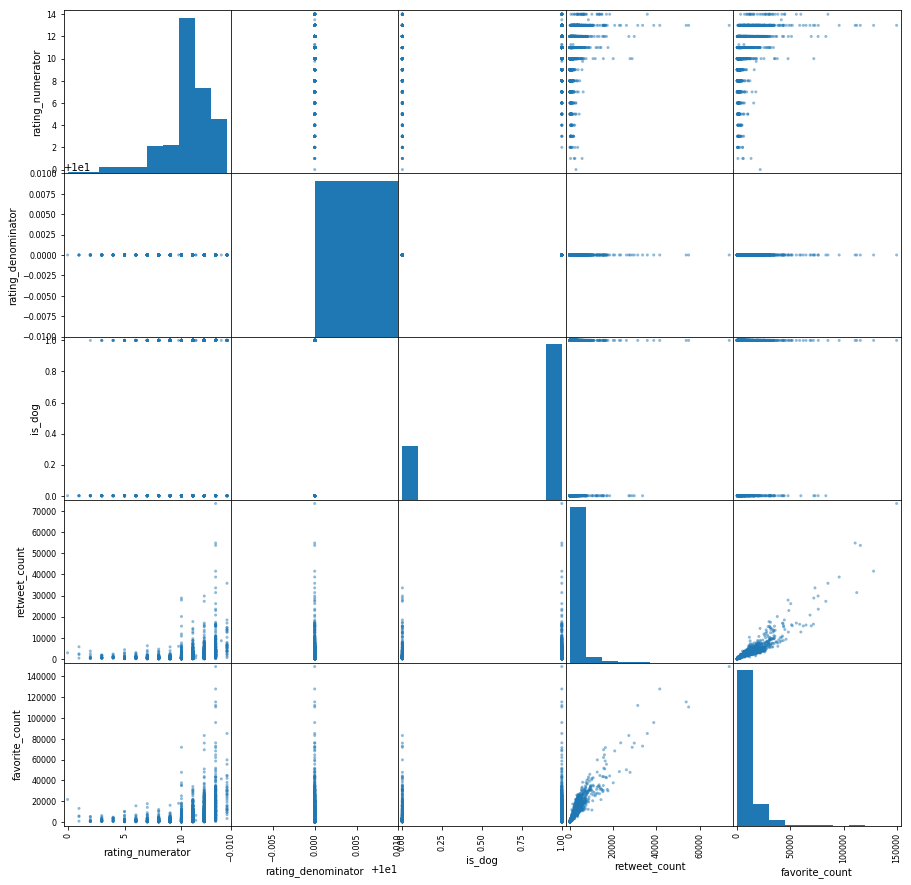

In [103]:
#scatter matrix
pd.plotting.scatter_matrix(analysis_data,figsize=(15,15))
plt.savefig('matrix.png')

###### Is there a relationship between favorite count and retweet count?

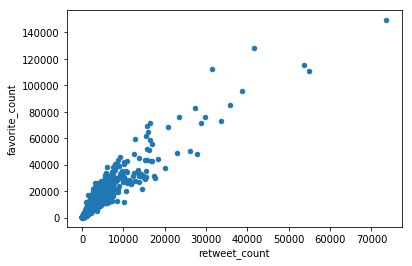

In [104]:
analysis_data.plot(x='retweet_count', y='favorite_count' , kind='scatter')
plt.savefig('retweet_count_related_favorite_count.png')

There is a positive relationship between favorite count and retweet count

###### Does favorites & retweets count increase or decrease by time?

In [105]:
average_retweets_by_date = analysis_data.groupby([(analysis_data.index.year),(analysis_data.index.month)]).retweet_count.mean()
average_favorite_by_date= analysis_data.groupby([(analysis_data.index.year),(analysis_data.index.month)]).favorite_count.mean()

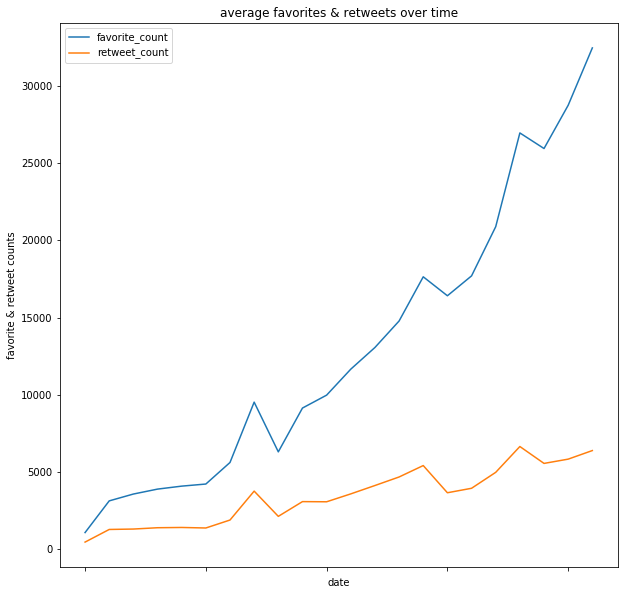

In [106]:
average_favorite_by_date.plot(figsize=(10,10))
average_retweets_by_date.plot(figsize=(10,10))
plt.title('average favorites & retweets over time')
plt.xlabel('date')
plt.ylabel('favorite & retweet counts')
plt.legend()
plt.savefig('average _favorites&retweets_over_time.png')

Favorites highly increase by time & retweets increase also by time but not that high 

###### Does the rating of dogs increase by time?

In [107]:
average_rating_by_date = analysis_data.groupby([(analysis_data.index.year),(analysis_data.index.month)]).rating_numerator.mean()


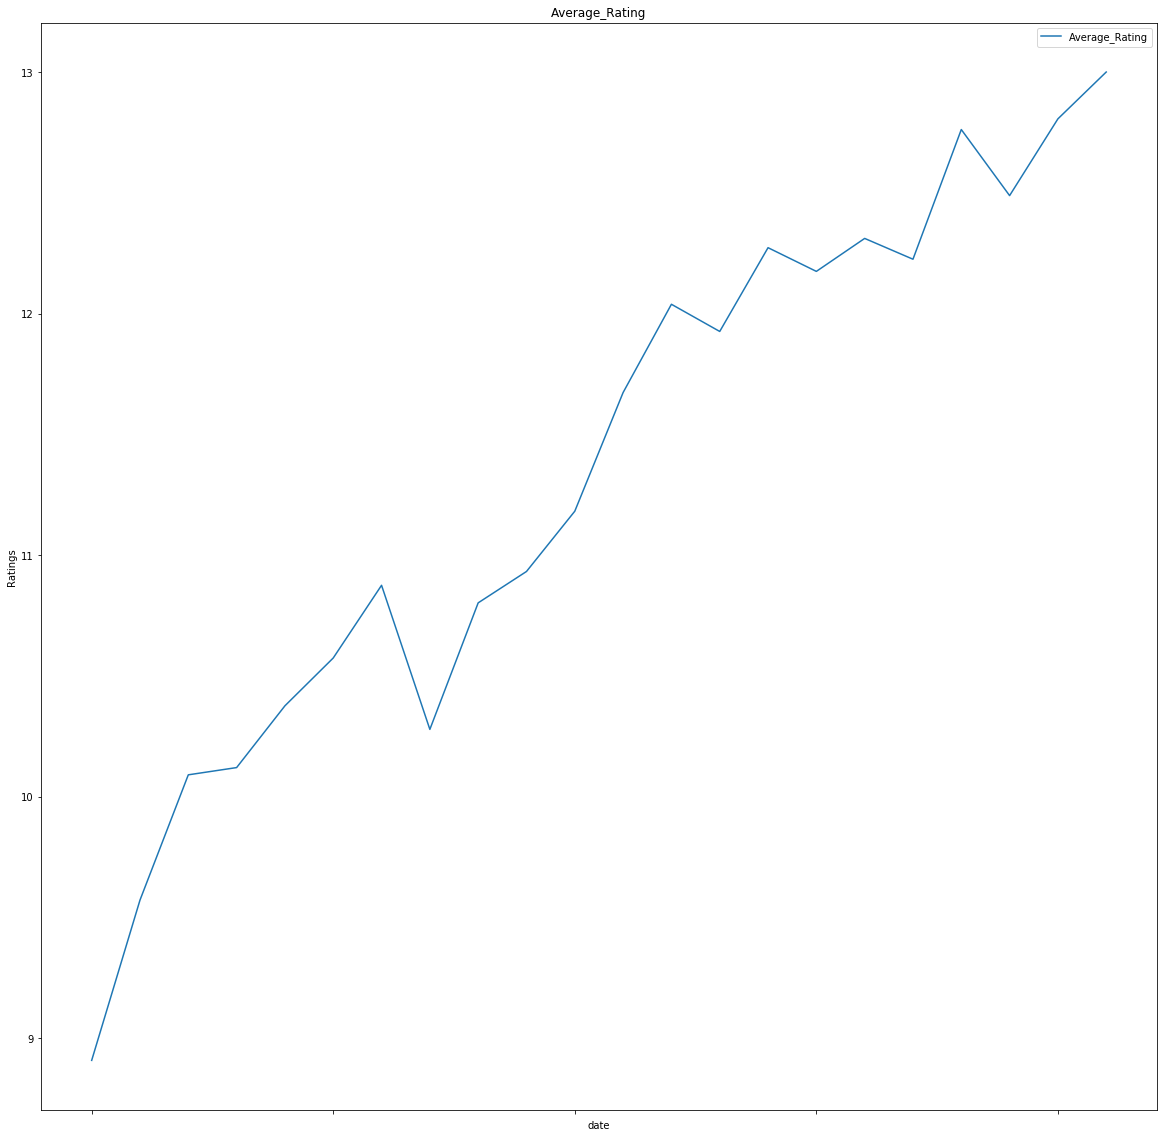

In [108]:
average_rating_by_date.plot(figsize=(20,20),label='Average_Rating')
plt.title('Average_Rating')
plt.xlabel('date')
plt.ylabel('Ratings')
plt.legend()
plt.savefig('Average_Rating.png')

The rating on tweets of dogs are raising by time 

###### Is the dog stage have an impact on favorite count and its ratings ?

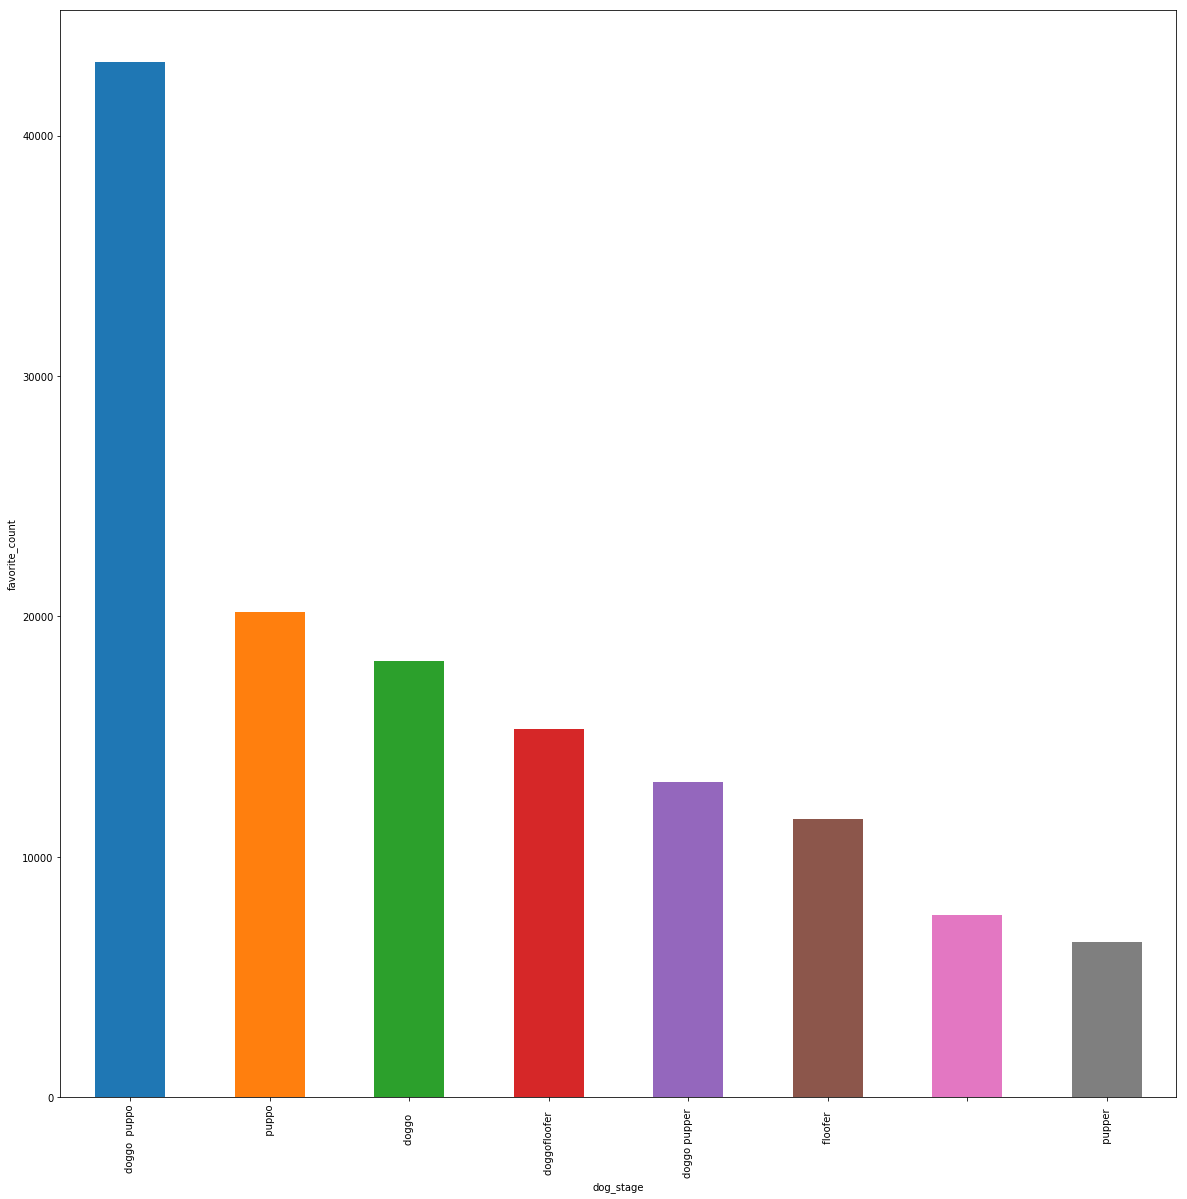

In [109]:
analysis_data.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(20,20))
plt.ylabel('favorite_count')
plt.xlabel('dog_stage')
plt.savefig('favorite_dog_stage.png')

Tweets that have (doggo  puppo) both in it have a highest favorites count on average.Then comes puppo only then doggo only.

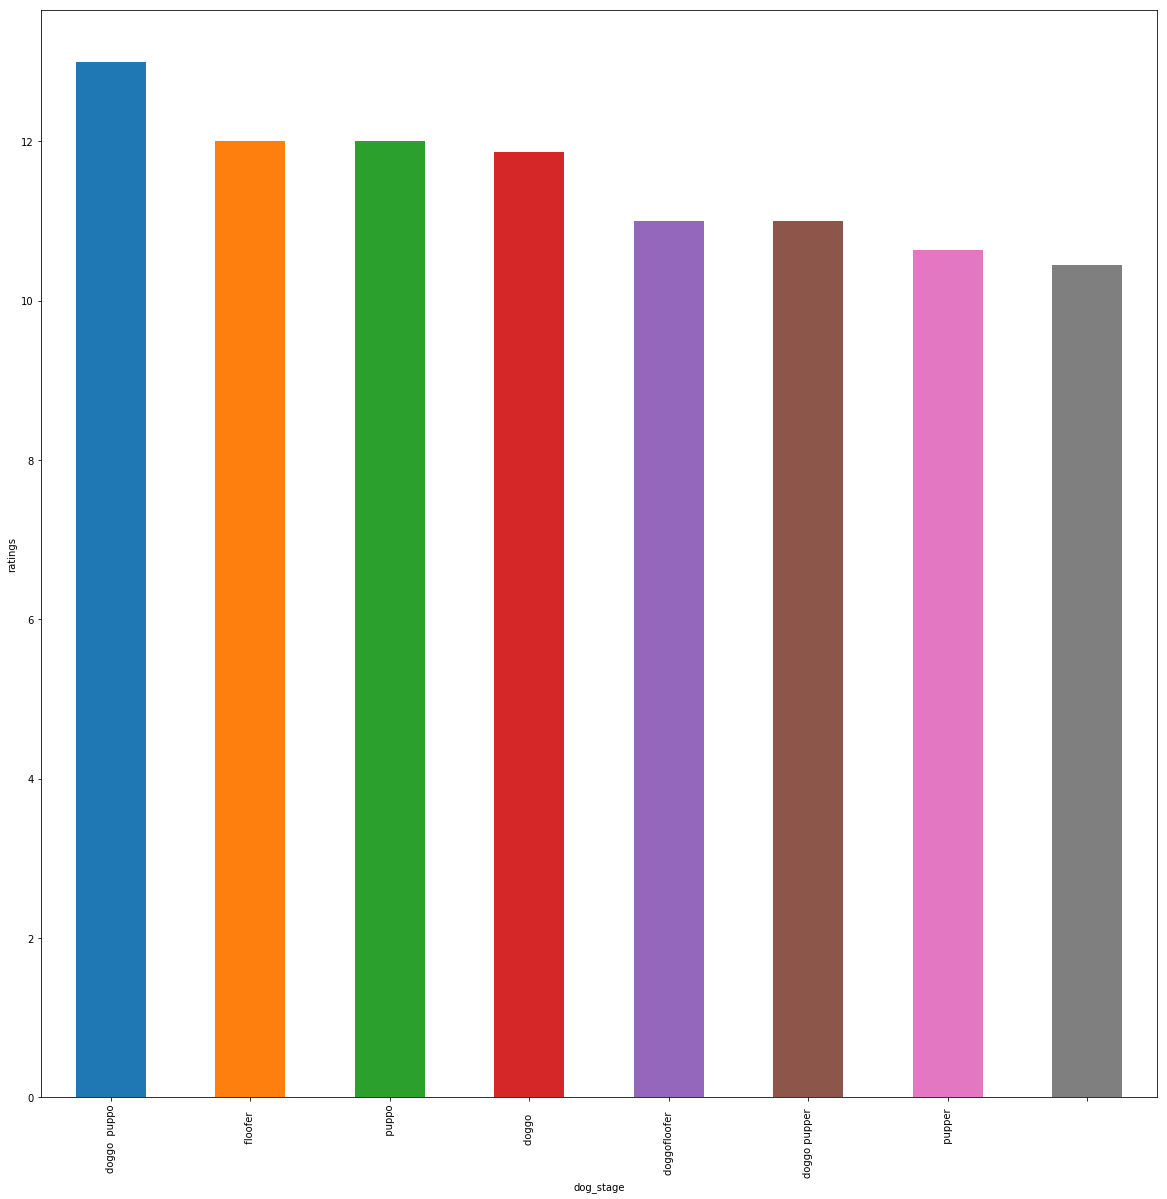

In [110]:
analysis_data.groupby('dog_stage')['rating_numerator'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(20,20))
plt.ylabel('ratings')
plt.xlabel('dog_stage')
plt.savefig('rating_dog_stage.png')

Tweets that have (doggo  puppo) both in it have a highest favourites count on average and also have the highest rating on average.Then comes puppo then doggo. 

In [111]:
dogs_only=analysis_data.loc[analysis_data.is_dog==True, ['retweet_count','favorite_count', 'dog_sort','rating_numerator']]

In [112]:
dogs_only.dog_sort.value_counts()

Golden_Retriever               137
Labrador_Retriever             92 
Pembroke                       88 
Chihuahua                      77 
Pug                            54 
Chow                           41 
Samoyed                        39 
Pomeranian                     38 
Toy_Poodle                     36 
Malamute                       29 
Cocker_Spaniel                 27 
French_Bulldog                 25 
Chesapeake_Bay_Retriever       23 
Miniature_Pinscher             21 
German_Shepherd                20 
Siberian_Husky                 20 
Shetland_Sheepdog              18 
Eskimo_Dog                     18 
Staffordshire_Bullterrier      18 
Maltese_Dog                    18 
Beagle                         17 
Shih-Tzu                       17 
Cardigan                       17 
Italian_Greyhound              16 
Rottweiler                     16 
Lakeland_Terrier               15 
Kuvasz                         15 
Great_Pyrenees                 14 
West_Highland_White_

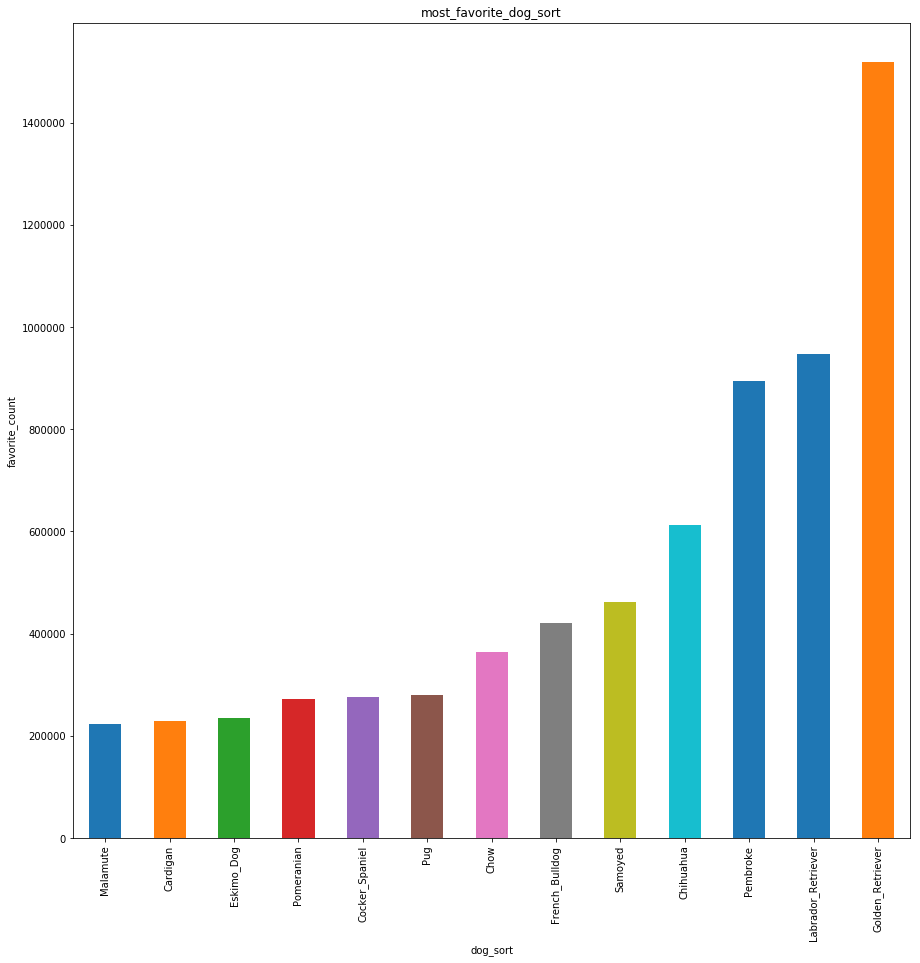

In [117]:
dogs_only.groupby('dog_sort')['favorite_count'].sum().sort_values(ascending=False)[12::-1].plot(kind='bar',figsize=(15,15))
plt.ylabel('favorite_count')
plt.xlabel('dog_sort')
plt.title('most_favorite_dog_sort')
plt.savefig('most_favorite_dog_sort.png')

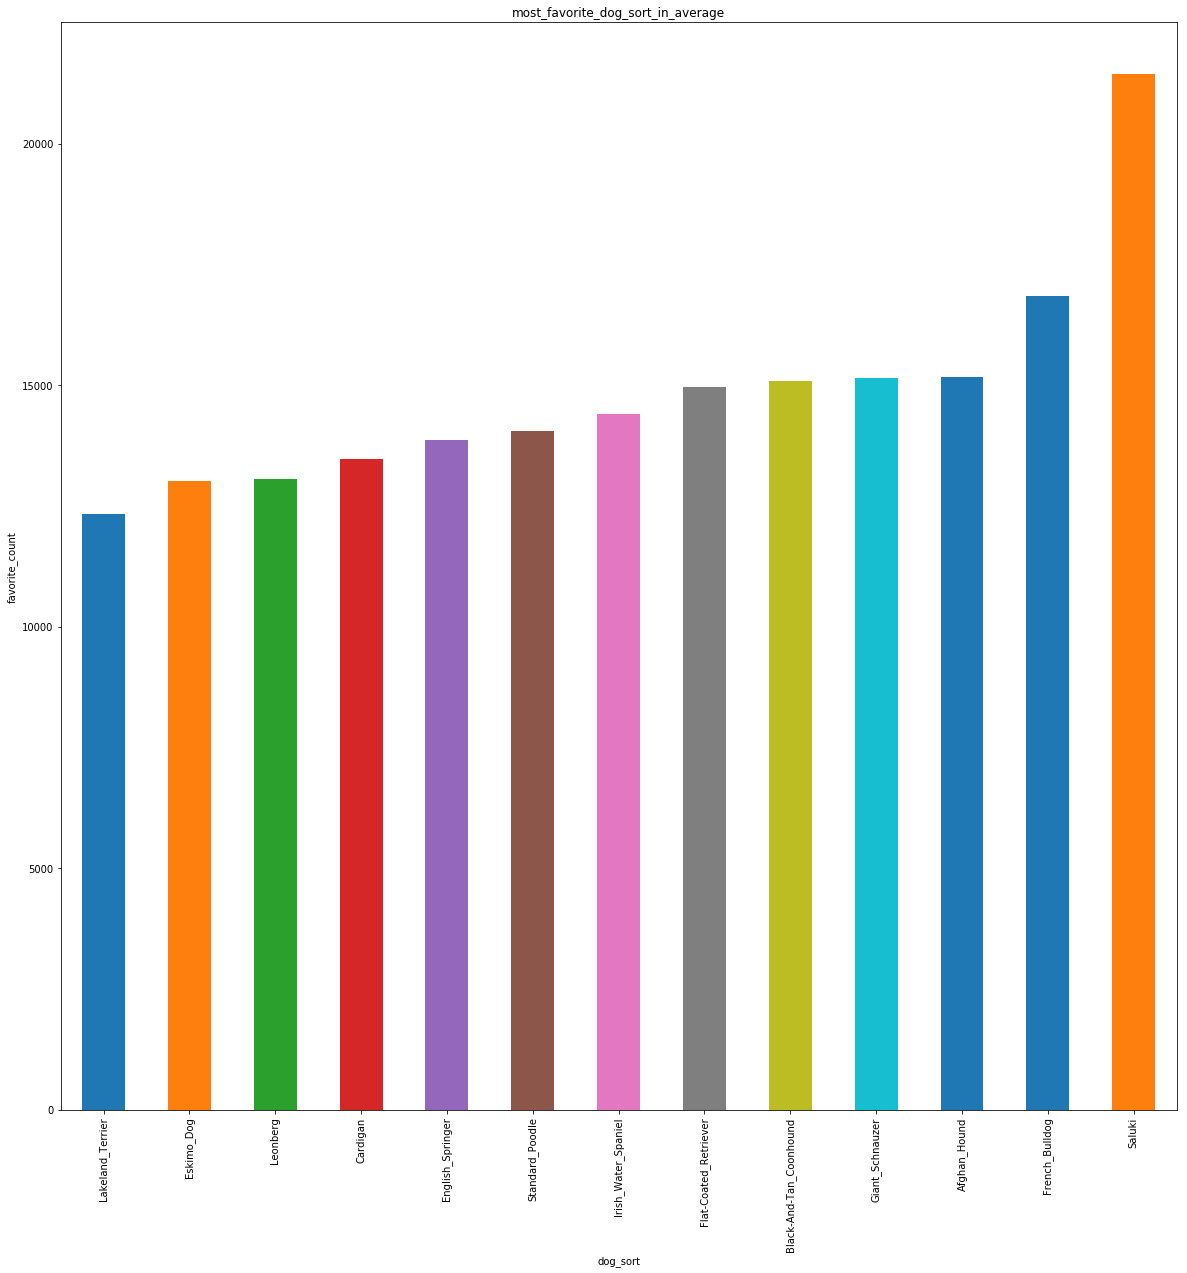

In [118]:
dogs_only.groupby('dog_sort')['favorite_count'].mean().sort_values(ascending=False)[12::-1].plot(kind='bar',figsize=(20,20))
plt.ylabel('favorite_count')
plt.xlabel('dog_sort')
plt.title('most_favorite_dog_sort_in_average')
plt.savefig('most_favorite_dog_sort_in_average.png')

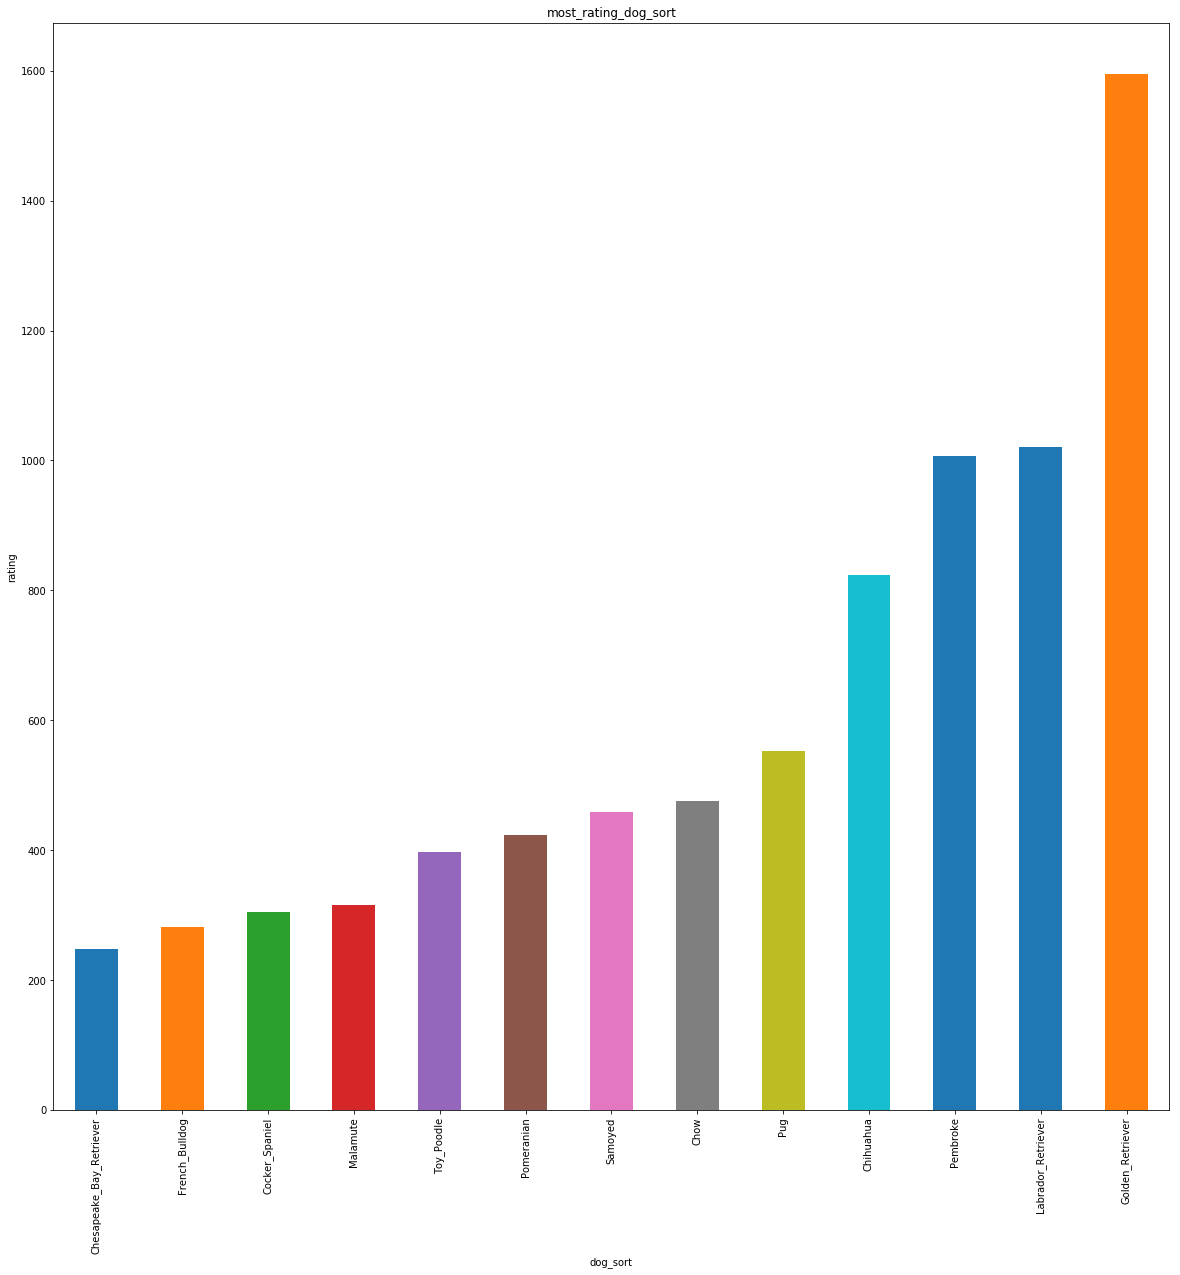

In [119]:
dogs_only.groupby('dog_sort')['rating_numerator'].sum().sort_values(ascending=False)[12::-1].plot(kind='bar',figsize=(20,20))
plt.ylabel('rating')
plt.xlabel('dog_sort')
plt.title('most_rating_dog_sort')
plt.savefig('most_rating_dog_sort.png')

Text(0.5,1,'most_rating_dog_sort_in_average')

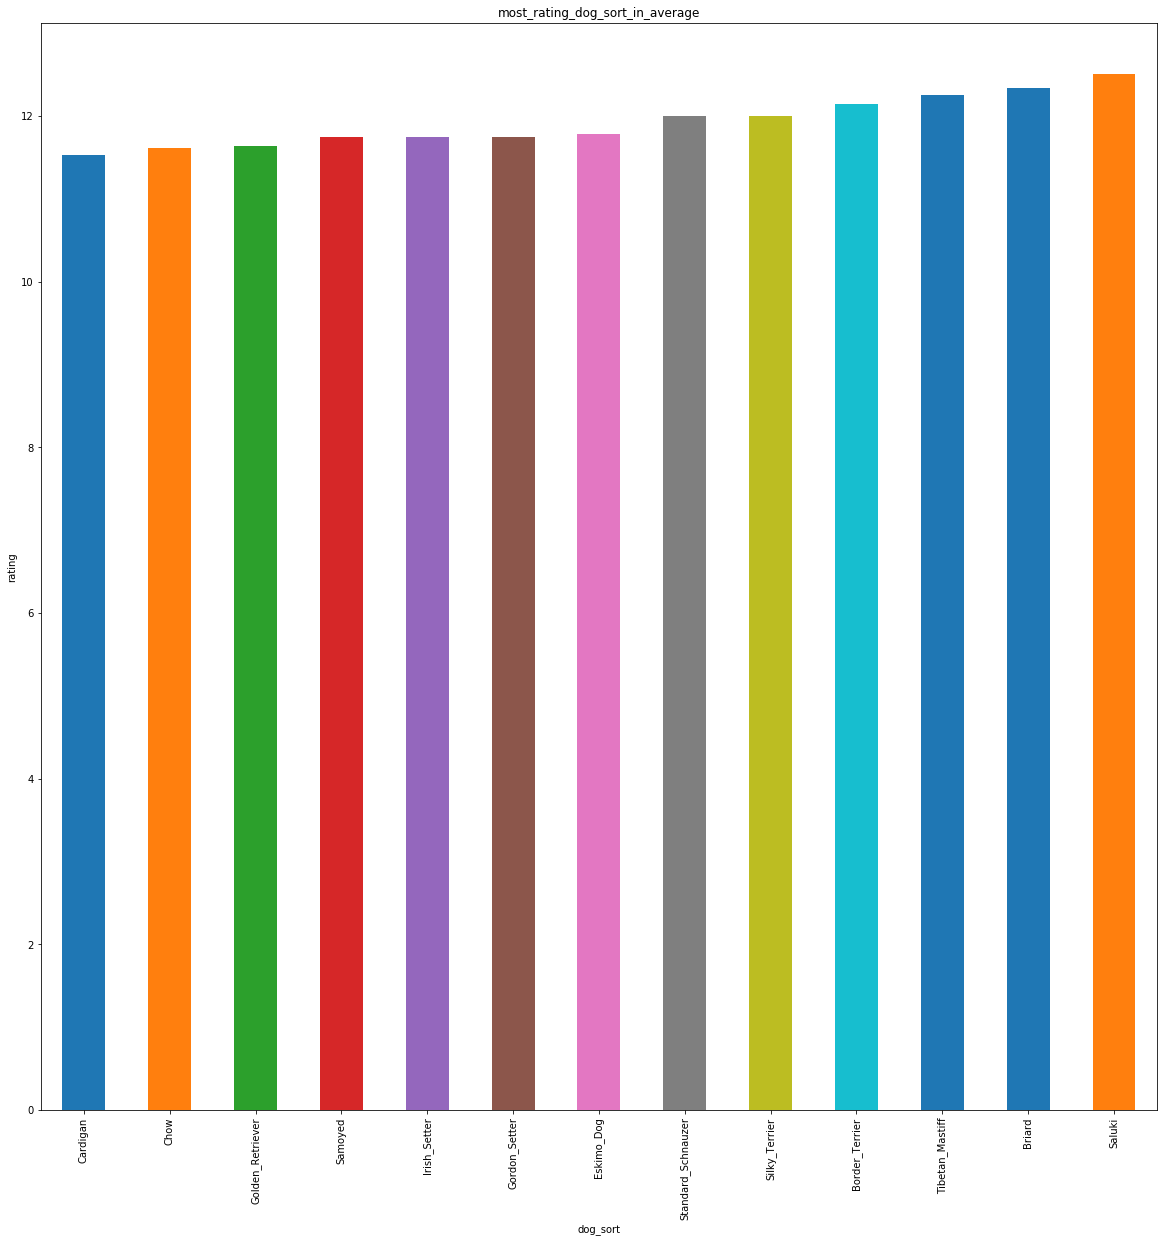

In [120]:
dogs_only.groupby('dog_sort')['rating_numerator'].mean().sort_values(ascending=False)[12::-1].plot(kind='bar',figsize=(20,20))
plt.ylabel('rating')
plt.xlabel('dog_sort')
plt.savefig('most_rating_dog_sort_in_average.png')
plt.title('most_rating_dog_sort_in_average')